In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
sns.set_theme()
%matplotlib inline
# plt.style.use('presentation.mplstyle')

In [2]:
netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [3]:
def get_value_count(attr):
    print(netflix_df[attr].value_counts())

In [4]:
get_value_count('country')

United States                     2032
India                              777
United Kingdom                     348
Japan                              176
Canada                             141
                                  ... 
United States, Canada, Ireland       1
United States, South Korea           1
Argentina, United States             1
Israel, Germany                      1
France, Netherlands, Singapore       1
Name: country, Length: 554, dtype: int64


In [5]:
# Checking if any of the columns have a missing value
netflix_df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool

In [6]:
# Number of missing entries in each column
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
# Total number of missing entries
netflix_df.isnull().sum().sum()

3036

In [8]:
# Imputing the missing data for the categorical attributes with undefined
for attr in ['director', 'cast', 'country']:
    netflix_df[attr].fillna('Undefined', inplace=True)
# Dropping the missing data for the numerical values
netflix_df.dropna(subset=['date_added', 'rating'], inplace=True)

In [9]:
# Checking if the data is clean
netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [10]:
# Checking for the index where we have duplicate rows
np.where(netflix_df.duplicated() == True)

(array([], dtype=int64),)

# Data Visualization

  ## Netflix content by Type

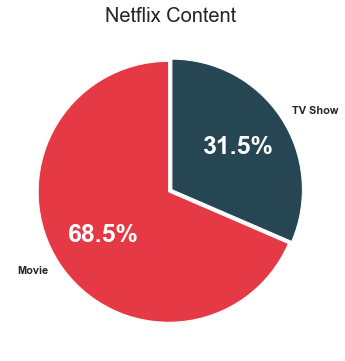

In [32]:
# Setting the size for the labels
font = {'weight' : 'bold',
        'size'   : 25}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(12, 6))
plt.title('Netflix Content', fontsize=20)
piechart = plt.pie(netflix_df.type.value_counts(), # the data (df)
                   explode=(0.015, 0.015), # the gap between the pies, we need to define the explode for each of the splits, here only 2
                   labels=netflix_df.type.value_counts().index,  # labels of the data 
                   colors=['#e63946','#264653'], # color for each of the division
                   startangle=90, # for rotating the pie chart by the given angle
                   autopct='%1.1f%%') # Providing percentage inside the division
# getting the percentage divison values and setting their color to white. This will only work if autopct is set in the piechart
for division_text in piechart[2]:
    division_text.set_color('white')
plt.show()